In [22]:

import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import operator

from sklearn.cross_validation import train_test_split
from random import shuffle
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import jj_basic_fn as JJ
from sklearn import ensemble
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import itertools

#matrix inverse
from numpy.linalg import inv

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', -1)

n_classifier = 7

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
def get_ml_data(dat, patid, test_size = 0.2, if_stimulated = 'all', if_itd = True, if_scaler = 0, if_remove_icd = 1):
    dat = dat.loc[dat.loc[:,'patid'] == patid]
    y = dat.loc[:,'label']
    drop_list = ['label', 'region_start_time', 'patid', 'epoch', 'if_stimulated']
    if if_remove_icd:
        drop_list.append('i12')
        drop_list.append('i34')
    X = dat.drop(drop_list, axis = 1, inplace = False)
    
    y=y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    if if_scaler:
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)    
    
        
    return X_train, X_test, y_train, y_test






In [4]:
import pickle
data = pickle.load( open( "../data/ml_ready_data.p", "rb" ) )


### What the data looks like

In [7]:
data

,region_start_time,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,alpha4,beta1,beta2,beta3,beta4,low_gamma1,low_gamma2,low_gamma3,low_gamma4,high_gamma1,high_gamma2,high_gamma3,high_gamma4,all1,all2,all3,all4,i12,i34,epoch,label,patid,if_stimulated
86,2016-02-14 03:59:36.960000,61.166778,273.677298,33.567358,81.248635,67.960011,407.512272,63.612451,165.585550,33.925524,162.907198,57.022700,124.072916,49.942659,210.731685,98.466079,165.458683,18.695004,103.421166,105.274561,112.045059,16.015592,35.626594,48.474736,42.528788,246.179542,1191.769707,405.645495,690.393928,0.0,0.0,0,True,222_1,False
87,2016-02-15 20:59:18.960000,40.548973,773.155101,25.976912,93.999416,88.948090,503.859680,73.651095,197.519216,39.238212,112.808047,86.997672,128.031087,52.873261,138.517794,152.987582,171.241961,14.265443,65.359496,72.104178,96.212837,15.319884,27.377590,33.609060,41.340546,249.884114,1618.783446,443.833246,725.660202,0.0,0.0,0,True,222_1,False
88,2016-02-16 20:59:12.998400,41.771439,172.179808,32.841170,87.193192,80.706647,365.497321,85.883900,207.473196,33.080845,94.292694,75.533254,123.768713,56.404587,143.718022,118.482315,178.673804,14.339917,69.583152,72.095121,100.593240,15.511631,28.402951,44.420213,42.202363,241.541982,868.979000,428.166103,737.353398,0.0,0.0,0,True,222_1,False
89,2016-02-18 03:58:56.006400,42.171886,290.146546,36.623015,105.840151,63.743944,355.238470,74.584257,193.461227,30.871455,144.966682,72.422374,116.980173,45.148116,206.176548,108.270834,163.863623,16.005505,93.627380,76.516633,92.099606,15.886343,34.121157,39.598289,37.980698,213.537969,1122.512570,406.710365,705.827207,0.0,0.0,0,True,222_1,False
90,2016-02-19 03:58:42.960000,45.669293,290.906731,25.191819,97.232429,86.755984,408.625743,64.573149,182.458502,36.730032,156.588716,62.576354,139.567459,40.670068,208.031761,100.449275,162.223919,14.537095,94.498731,69.536017,87.049100,15.697947,32.902126,34.724215,39.093305,239.781694,1186.575819,356.510537,707.127559,0.0,0.0,0,True,222_1,False
91,2016-02-25 20:57:42.019200,40.690762,143.452763,20.017653,84.349660,70.185465,298.778964,63.712581,187.682256,40.480499,124.879448,90.047558,158.766110,69.582234,138.830090,175.467275,241.053966,15.364279,74.841248,61.701677,99.329107,15.691182,31.262835,27.282511,45.456615,251.619323,809.810557,437.269587,813.248139,0.0,0.0,0,True,222_1,False
92,2016-02-27 03:57:25.027200,46.372228,197.027519,59.479692,142.762270,70.416304,267.841576,119.720890,228.432295,92.206276,168.611750,72.740025,139.582448,51.747494,206.568610,157.475100,165.038254,12.468371,77.860935,58.551378,67.348458,14.885366,27.811003,35.298766,32.740643,287.297044,938.315861,502.252855,774.744611,0.0,0.0,0,True,222_1,False
93,2016-02-27 15:57:23.040000,48.966374,181.547346,28.612515,84.556679,86.080660,353.788040,85.700540,241.125145,40.860754,138.565280,81.331796,158.148734,60.727009,129.556731,120.082370,177.946510,15.221299,70.128487,55.009903,81.472875,15.977915,30.501644,28.431565,35.663814,267.626169,896.917684,398.794113,773.895906,0.0,0.0,0,True,222_1,False
94,2016-03-02 03:56:47.011200,37.949515,177.184680,25.164441,114.003297,60.099358,247.724630,86.791745,205.304044,33.358201,117.547139,127.287526,158.071696,50.568384,166.873544,159.130591,182.808226,13.655150,78.657507,44.672032,72.206554,14.889559,31.338755,22.642040,37.287734,210.466377,813.174911,464.743306,768.996889,0.0,0.0,0,True,222_1,False
95,2016-03-02 20:56:43.008000,46.809814,141.505547,16.087615,74.042714,77.717782,293.220474,80.185782,147.807937,34.054828,144.609064,85.004588,135.961049,73.235561,169.325195,249.042240,232.962003,14.660576,77.665403,65.129887,115.447258,15.076227,31.471940,24.895978,38.834809,260.323871,853.110058,519.571985,742.681781,0.0,0.0,0,True,222_1,False


### trainning data (consists of 7 bandwidths in four channels, total 28 features)

In [10]:
X_train, X_test, y_train, y_test = get_ml_data(data, '231', if_scaler = 1, if_remove_icd = 1)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.144473,-0.199038,-0.166507,-0.235716,-0.081846,-0.127119,-0.202029,-0.137779,-0.085094,-0.076789,-0.074294,-0.093595,-0.067877,-0.062245,-0.039152,-0.069711,-0.043551,-0.050782,-0.045938,0.063465,-0.021502,0.039042,0.369236,0.614891,-0.070757,-0.084579,-0.103836,-0.094723
1,-0.320519,-0.420550,-0.463038,-0.236083,-0.084618,-0.128101,-0.028522,-0.113435,-0.111894,-0.100184,-0.122495,-0.147707,-0.094775,-0.096283,-0.140941,-0.133000,-0.124577,-0.148363,-0.185542,-0.189428,-0.138050,-0.175068,-0.268227,-0.405283,-0.105690,-0.120157,-0.141838,-0.145132
2,-0.469270,-0.368688,-0.352813,-0.055146,-0.110643,-0.137161,-0.039346,-0.127078,-0.108892,-0.099850,-0.111594,-0.126429,-0.093430,-0.083831,-0.059720,-0.096285,-0.068071,-0.115637,-0.032043,-0.028413,-0.008458,0.007080,0.661236,1.009465,-0.111396,-0.111739,-0.092235,-0.104646
3,-0.425582,-0.420333,-0.212045,-0.222721,-0.108535,-0.143326,-0.149898,-0.137467,-0.115328,-0.109414,-0.109781,-0.150391,-0.110475,-0.095541,-0.123884,-0.151252,-0.087906,-0.123483,-0.045391,-0.170085,-0.127507,-0.083608,-0.080698,-0.237487,-0.120524,-0.123714,-0.133305,-0.156726
4,1.884456,1.511019,1.053403,1.092623,0.073832,0.193568,0.117380,0.180629,0.043906,0.031398,-0.009875,0.047287,0.004562,-0.049804,-0.088955,0.032950,-0.009949,-0.112003,-0.163203,-0.077148,-0.039155,-0.030855,-0.518963,0.003524,0.079222,0.072779,0.078463,0.129800
5,-0.194816,-0.132318,-0.213311,-0.561041,-0.115628,-0.117585,-0.040239,-0.184169,-0.079373,-0.093411,-0.122739,-0.142030,-0.054285,-0.058371,-0.107350,-0.146131,-0.068553,-0.054531,-0.086928,-0.212292,-0.131501,-0.163989,-0.283206,-0.512838,-0.082730,-0.085236,-0.106910,-0.187902
6,1.537382,1.484901,1.476726,1.158971,0.069925,0.243484,0.510970,0.230086,0.028612,0.041276,0.066062,0.189617,0.014108,-0.042980,0.120233,0.134353,0.037662,0.139053,-0.077961,0.327964,-0.032313,0.196384,-0.530349,1.126716,0.073180,0.101808,0.310856,0.255251
7,0.902219,0.668399,-0.153939,-0.104643,-0.032715,0.053402,-0.013570,0.047573,-0.036912,-0.036204,-0.018643,-0.005631,-0.054305,-0.033938,-0.028183,0.002619,-0.044394,-0.057100,-0.050471,0.143469,-0.020531,-0.012079,-0.500380,0.868121,-0.019890,0.004911,-0.036346,0.020952
8,-0.430282,-0.334190,-0.375531,-0.399337,-0.108062,-0.111800,-0.141512,-0.137516,-0.102289,-0.094192,-0.101338,-0.132900,-0.069590,-0.082247,-0.062876,-0.122158,-0.079446,-0.074298,-0.067994,-0.201198,-0.104261,-0.168156,-0.219999,-0.273072,-0.099176,-0.102545,-0.125816,-0.153352
9,1.097161,0.497895,0.107929,0.499653,-0.088288,-0.020266,-0.114627,-0.039246,-0.065391,-0.057476,-0.084961,-0.110852,-0.078375,-0.059890,-0.094559,-0.046119,-0.019483,0.013252,0.001248,-0.033328,0.104637,0.190073,0.707169,0.642939,-0.045952,-0.028001,-0.072106,-0.028622


### Fitting 7 classfier to the training data and tune the hyperparameter using 10-fold cross-validation. Evaluate the performance of each classifier using test data

### 1:'Logistic Regression' (regulation type, regulation parameter)
### 2: 'SVM' (kernel type, degreee, regulation type, regulation parameter)
### 3: 'Gaussian Naive Bayes classifier'
### 4:'Linear Discriminant Analysis'
### 5:'Decision Tree' (criterion for splliting, max depth, min sample per leaf)
### 6:'Random Forest' (criterion for splliting, number of trees, number of features used in each  tree, max depth, min sample per leaf)
### 7:'Gradient Boosting' (number of estimator, number of samples used in each estimator, max depth, min sample per leaf, learning rate)


## Classifier Performance

### The confusion matrix and ROC of Logistic Regression

Confusion matrix, without normalization


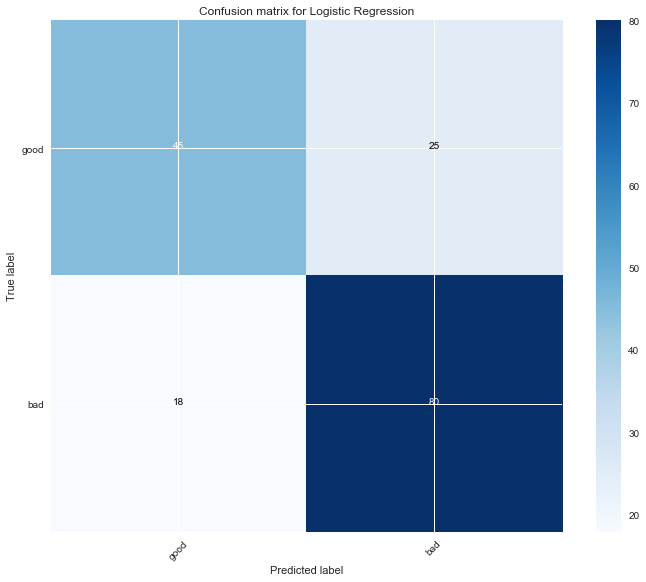

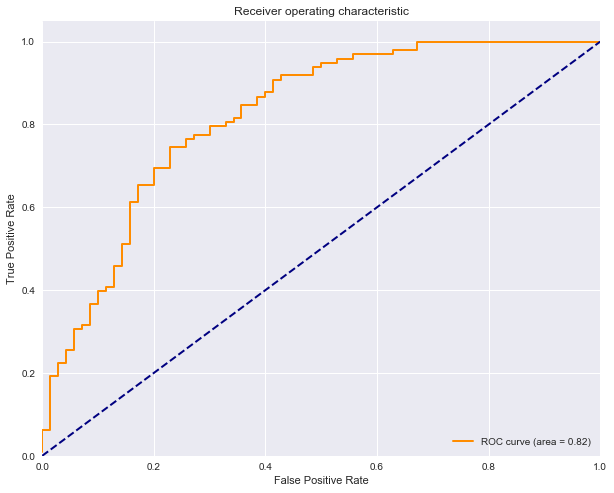

In [26]:
JJ.estimator_performance(1, X_test, y_test, if_plot_c = 1, if_plot_roc = 1)

### Performace Overview of each Classifier

In [14]:
X_train, X_test, y_train, y_test = get_ml_data(data, '231', if_scaler = 1, if_remove_icd = 1)

JJ.scores_estimators(X_test, y_test)

{'decision tree': 0.80750915750915753, 'SVM': 0.83791208791208782, 'gradient boosting': 0.86153846153846159, 'random forest': 0.85073260073260071, 'Logistic Regression': 0.81749084249084247}


,Classifier,AUC
0,gradient boosting,0.861538
1,random forest,0.850733
2,SVM,0.837912
3,Logistic Regression,0.817491
4,decision tree,0.807509


,Classifier,Accuracy
0,gradient boosting,0.815476
1,random forest,0.797619
2,decision tree,0.773810
3,Logistic Regression,0.744048
4,SVM,0.738095


### ROC curve for all classifiers

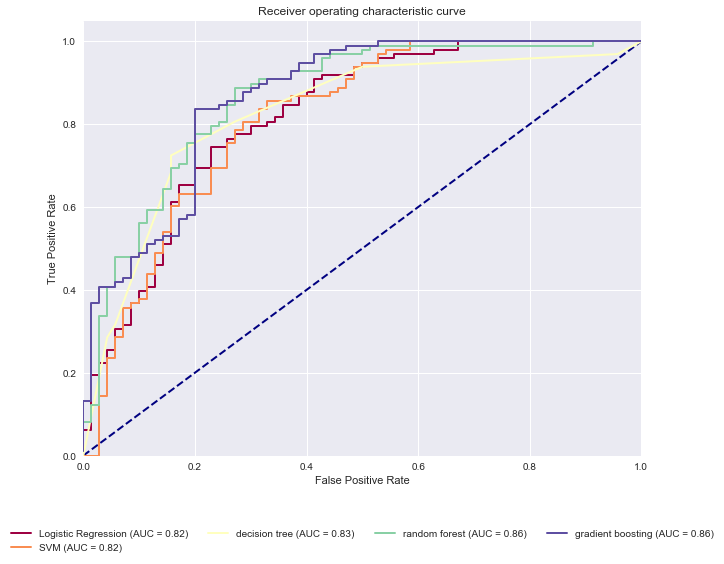

In [14]:
JJ.plot_roc_all(X_test, y_test)

### Ensemble SVM, Logistic Regression, Random Forest and Gradient Boosting

In [21]:

X_train, X_test, y_train, y_test = get_ml_data(data, '231', if_scaler = 1, if_remove_icd = 1)
#parameter_tuning(X_train, X_test, y_train, y_test, classifier = 1, C_range_num = 100, if_save = 1)
JJ.ensemble_model(X_train, y_train, X_test, y_test, if_save = 0)

0.815476190476


## Feature Importance

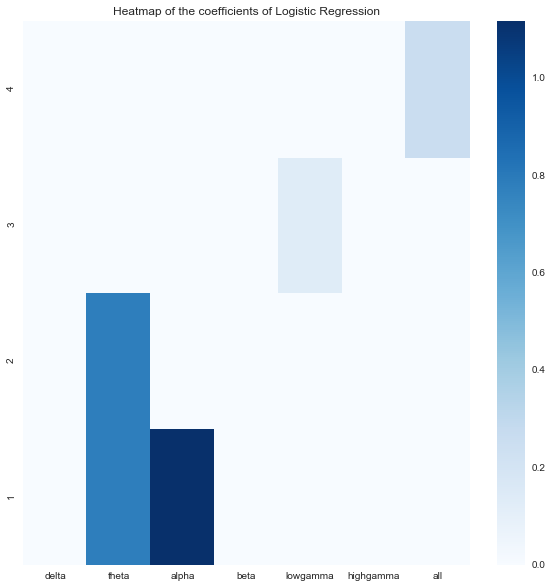

In [25]:
classifier_int = 1
int2name = {1:'Logistic Regression', 2: 'SVM', 3: 'Gaussian Naive Bayes classifier', 4:'Linear Discriminant Analysis', 5:'decision tree', 6:'random forest', 7:'gradient boosting'}
clf_name = int2name[classifier_int]
clf = pickle.load(open('best_estimator_for_' + str(clf_name) + '.p', "rb" ))
coef = np.abs(clf.coef_.reshape(4,7))
powerband = ['delta', 'theta', 'alpha', 'beta', 'lowgamma', 'highgamma', 'all']
channel = ['1', '2','3','4',]
df = pd.DataFrame(coef, index = channel, columns = powerband)
import seaborn as sns
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(10,10))
r = sns.heatmap(coef, cmap = "Blues")
r.set_title("Heatmap of the coefficients of {}".format(clf_name))
ax.set_yticklabels(df.index)
ax.set_xticklabels(df.columns)
sns.plt.show()

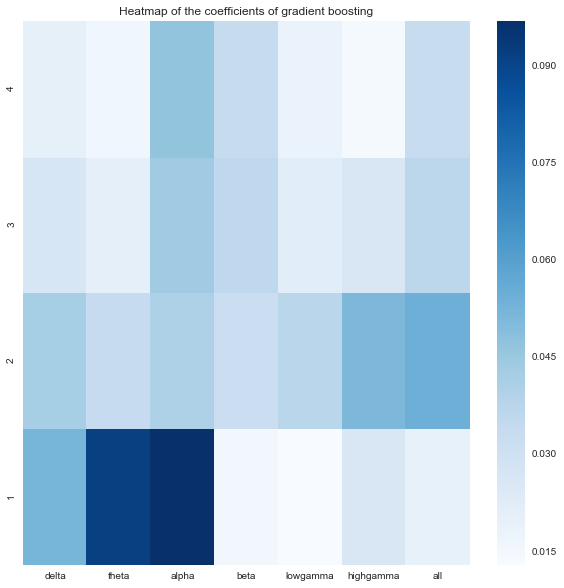

In [24]:
classifier_int = 7
int2name = {1:'Logistic Regression', 2: 'SVM', 3: 'Gaussian Naive Bayes classifier', 4:'Linear Discriminant Analysis', 5:'decision tree', 6:'random forest', 7:'gradient boosting'}
clf_name = int2name[classifier_int]
clf = pickle.load(open('best_estimator_for_' + str(clf_name) + '.p', "rb" ))
coef = np.abs(clf.feature_importances_.reshape(4,7))
powerband = ['delta', 'theta', 'alpha', 'beta', 'lowgamma', 'highgamma', 'all']
channel = ['1', '2','3','4',]
df = pd.DataFrame(coef, index = channel, columns = powerband)
import seaborn as sns
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(10,10))
r = sns.heatmap(coef, cmap = "Blues")
r.set_title("Heatmap of the coefficients of {}".format(clf_name))
ax.set_yticklabels(df.index)
ax.set_xticklabels(df.columns)
sns.plt.show()

### Next step: scatter plot between important features, investigate other features importance methods, fit data of other patients, investigate the influence of parametes of the device on the